# Your info

Full name: Arman Heydari

Student ID: 97521252

# Q2

PART A:

In [1]:
# Q2_graded
import numpy as np

patterns = np.array([[1,-1,1,1,-1,1], [1,-1,1,-1,1,-1], [1,1,1,1,1,-1]])
patterns

array([[ 1, -1,  1,  1, -1,  1],
       [ 1, -1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1, -1]])

find the weights of hopfield model.

In [2]:
# Q2_graded
n = patterns.shape[1]
p = patterns.shape[0]
w = np.zeros((n, n))
for i in range(0, n):
  for j in range(0, n):
    for k in range(0, p):
      if i!=j:
        w[i,j] += patterns[k, i] * patterns[k, j]
w

array([[ 0., -1.,  3.,  1.,  1., -1.],
       [-1.,  0., -1.,  1.,  1., -1.],
       [ 3., -1.,  0.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  0., -1.,  1.],
       [ 1.,  1.,  1., -1.,  0., -3.],
       [-1., -1., -1.,  1., -3.,  0.]])

PART B:

In [3]:
# Q2_graded
sign = np.sign(np.dot(patterns, w))
if np.array_equal(sign, patterns):
  print("all the patterns are stable")
else:
  print("something is wrong!")

all the patterns are stable


PART C:

In [4]:
# Q2_graded
def update_hopfield(input):
  THRESHOLD = 0 
  flag = True
  counter = 0
  while flag:
    counter +=1
    next_state = np.dot(w, input)
    next_state[next_state>THRESHOLD] = 1
    next_state[next_state<=THRESHOLD] = -1
    if np.array_equal(input, next_state):       #updating ends when we have similar states sequentially.
      flag = False
    input = next_state
    
    if counter == 10000:
      print("this is iteration", counter, "so the hopfield neural network can't find an optimum state!")
      return -1
  return next_state

check the toggles of input patterns are stable or not:

In [5]:
# Q2_graded
inputs = np.array([[-1,1,-1,-1,1,-1], [-1,1,-1,1,-1,1], [-1,-1,-1,-1,-1,1]])
for input in inputs:
  if np.array_equal(input, update_hopfield(input)):
    print(input, " is stable!")
  else:
    print(input, " is unstable!")

[-1  1 -1 -1  1 -1]  is stable!
[-1  1 -1  1 -1  1]  is stable!
[-1 -1 -1 -1 -1  1]  is stable!


PART D:

In [6]:
# Q2_graded
test = update_hopfield(np.array([1,1,1,1,1,1]))

this is iteration 10000 so the hopfield neural network can't find an optimum state!


# Q3. Hopfield

In [10]:
# Q3_graded
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

we need a function to show images.

In [11]:
# Q3_graded
def render_images(images):
  columns = np.sqrt(len(images))
  rows = len(images)/columns
  fig = plt.figure(figsize=(rows*5, columns*5))
  for i in range(1, len(images)+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1], cmap='gray', vmin=0, vmax=255)
  plt.show()

load and preprocessing the training data:

In [12]:
# Q3_graded
train_path = 'data/sample/'
train_directories = sorted(os.listdir(train_path))
train_data = []
for path in train_directories:
  print(path)
  train_data.append(cv2.imread(train_path + path, cv2.IMREAD_GRAYSCALE))
train_data = np.array(train_data)
print("train data:", train_data.shape)

1.jpg
2.jpg
3.png
4.jpg
train data: (4, 100, 100)


and here is loading and preprocessing the test data. I resized the test datas with extra white pixels. so we can enter images with same size to the hofield network.

In [13]:
# Q3_graded
test_path = 'data/test/'
test_data = []
test_directories = sorted(os.listdir(test_path))
for i in range(len(test_directories)-1):
  if not(test_directories[i].endswith('.png') or test_directories[i].endswith('.jpg')):
    test_directories.pop(i)
n_train, width, height = train_data.shape
for path in test_directories:
  print(path)
  img = cv2.imread(test_path + path, cv2.IMREAD_GRAYSCALE)
  # x, y = img.shape
  # if x<width:
  #   temp = 255 * np.ones((width - x, y))
  #   img = np.concatenate((img, temp), axis = 0)
  # if y<height:
  #   temp = 255 * np.ones((width, height-y))
  #   img = np.concatenate((img, temp), axis = 1)
  temp = np.resize(img, (width, height))
  test_data.append(temp)
test_data = np.array(test_data)
n_test = test_data.shape[0]
print("test data", test_data.shape)

test1.jpg
test2.jpg
test3.png
test4.jpg
test data (4, 100, 100)


here I initialized weights array with zeros. and we will need a method to update weights with each specific pattern. so I implemented this method with respect to hebbian formula.

In [14]:
# Q3_graded
def find_weights(img, w):
  pattern = np.ones((width, height))
  pattern[img<200] = -1
  pattern = np.resize(pattern, (1, width*height))
  w = w + np.dot(pattern.T, pattern)
  np.fill_diagonal(w, 0.0)
  return w

and this method will update any input with the weights.

In [15]:
# Q3_graded
def update_input(input, w):
  temp = np.ones((width, height))
  temp[input<200] = -1
  input = np.resize(temp, (width*height,1))
  for i in range(100):
    next_state = np.dot(w, input)
    input = np.sign(next_state)
  result = np.reshape(input, (width, height))*255
  result[result<0] = 0
  return result

then we can run our hopfild network with test and train datas.

inputted patterns:


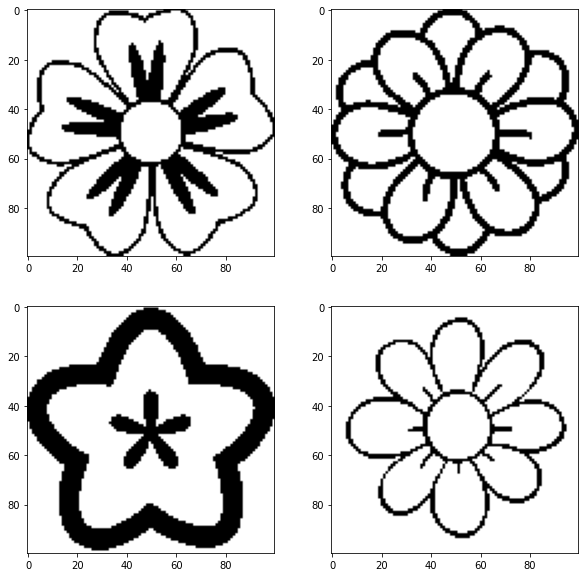

In [16]:
# Q3_graded
p_train = []
for img in train_data:
  temp = np.ones((width, height))*255
  temp[img<200] = 0
  p_train.append(temp)
print("inputted patterns:")
render_images(p_train)

images before updating with network:


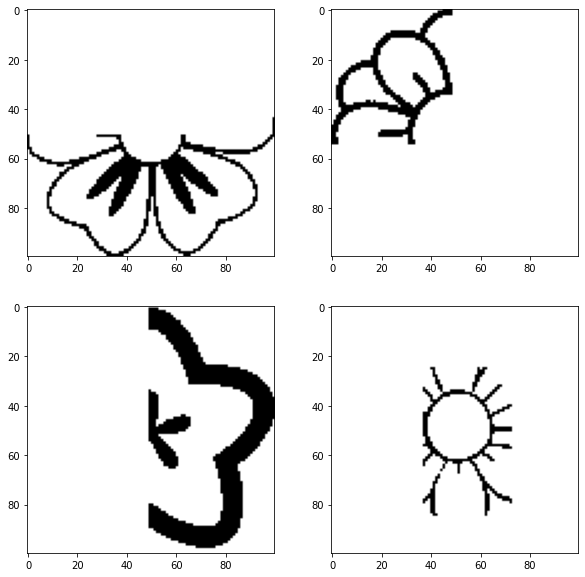

images after that:


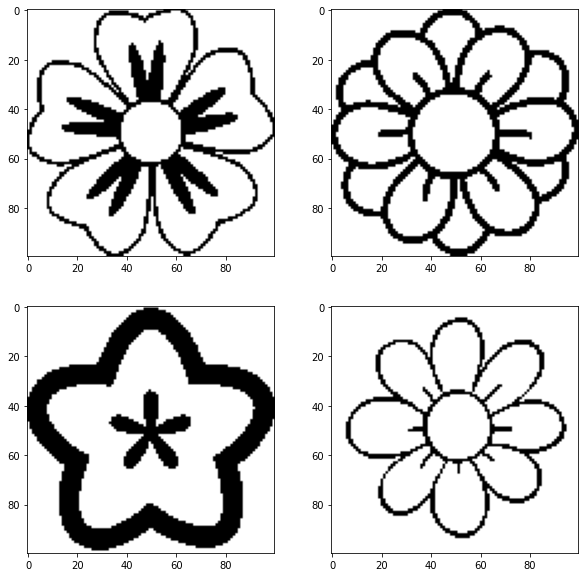

In [17]:
# Q3_graded
results = []
p_test = []
for i in range(4):
  w = find_weights(train_data[i], np.zeros((width*height, width*height)))
  temp = test_data[i]
  temp[temp<=200] = 0
  temp[temp>200] = 255
  p_test.append(temp)
  results.append(update_input(test_data[i], w))
print("images before updating with network:")
render_images(p_test)
print("images after that:")
render_images(results)

now we can check the accuracy:

In [18]:
# Q3_graded
for i in range(4):
  for j in range(4):
    print("similarity of updated", test_directories[i], 
          "with", train_directories[j], "is",100*(1 - np.mean(results[i] != p_train[j])), "%")
  print("----------------------------------")

similarity of updated test1.jpg with 1.jpg is 100.0 %
similarity of updated test1.jpg with 2.jpg is 71.50000000000001 %
similarity of updated test1.jpg with 3.png is 58.29 %
similarity of updated test1.jpg with 4.jpg is 75.84 %
----------------------------------
similarity of updated test2.jpg with 1.jpg is 71.50000000000001 %
similarity of updated test2.jpg with 2.jpg is 100.0 %
similarity of updated test2.jpg with 3.png is 60.830000000000005 %
similarity of updated test2.jpg with 4.jpg is 72.82 %
----------------------------------
similarity of updated test3.png with 1.jpg is 58.29 %
similarity of updated test3.png with 2.jpg is 60.830000000000005 %
similarity of updated test3.png with 3.png is 100.0 %
similarity of updated test3.png with 4.jpg is 67.17 %
----------------------------------
similarity of updated test4.jpg with 1.jpg is 75.84 %
similarity of updated test4.jpg with 2.jpg is 72.82 %
similarity of updated test4.jpg with 3.png is 67.17 %
similarity of updated test4.jpg wit

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI001_HW3.ipynb`
    - `Q2.py`
    - `Q3.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.